[*********************100%***********************]  1 of 1 completed


/home/jguese/miniconda3/lib/python3.10/site-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/home/jguese/miniconda3/lib/python3.10/site-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/home/jguese/miniconda3/lib/python3.10/site-packages/ta/trend.py:938: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_up = pd.Series(index=self._psar.index)
/home/jguese/miniconda3/lib/python3.10/site-packages/ta/trend.py:939: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_down = pd.Series(index=self._psar.index)


with just holding you would have won: 159176.78185670284
0.6942795466810577


[Text(0.5225409836065574, 0.9166666666666666, 'X[79] <= -61.997\ngini = 0.496\nsamples = 13139\nvalue = [7125, 6014]'),
 Text(0.26229508196721313, 0.75, 'X[72] <= 0.162\ngini = 0.438\nsamples = 4338\nvalue = [1404, 2934]'),
 Text(0.13114754098360656, 0.5833333333333334, 'X[7] <= 1229069615104.0\ngini = 0.372\nsamples = 2450\nvalue = [606, 1844]'),
 Text(0.06557377049180328, 0.4166666666666667, 'X[52] <= -0.306\ngini = 0.358\nsamples = 2346\nvalue = [547, 1799]'),
 Text(0.03278688524590164, 0.25, 'X[36] <= 0.675\ngini = 0.322\nsamples = 1844\nvalue = [372, 1472]'),
 Text(0.01639344262295082, 0.08333333333333333, 'gini = 0.475\nsamples = 90\nvalue = [35, 55]'),
 Text(0.04918032786885246, 0.08333333333333333, 'gini = 0.31\nsamples = 1754\nvalue = [337, 1417]'),
 Text(0.09836065573770492, 0.25, 'X[27] <= 0.013\ngini = 0.454\nsamples = 502\nvalue = [175, 327]'),
 Text(0.08196721311475409, 0.08333333333333333, 'gini = 0.396\nsamples = 367\nvalue = [100, 267]'),
 Text(0.11475409836065574, 0.0

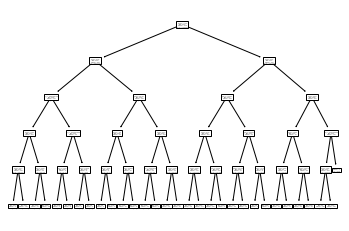

In [1]:
import yfinance as yf
import numpy as np
from ta import add_all_ta_features
from scipy.signal import argrelextrema

data = yf.download("ETH-USD", period = "720d", interval = "1h")
data = add_all_ta_features(data, open = "Open", high = "High", low = "Low", close = "Close", volume = "Volume")
data = data.fillna(0)

justholdWin = (10000 / data.iloc[0]["Open"]) * data.iloc[-1]["Close"]
print("with just holding you would have won: " + str(justholdWin))

# label data with min max stuff

def setExtrema(data):
    n = 20

    minextremai = argrelextrema(data.Close.values, np.less_equal,
                        order=n)[0]
    maxextremai = argrelextrema(data.Close.values, np.greater_equal,
                            order=n)[0]
    return minextremai, maxextremai

minextremai, maxextremai = setExtrema(data)
# which starts?
targets = []
crnt = 1
for i in range(len(data)):
    if i in minextremai:
        crnt = -1
    elif i in maxextremai:
        crnt = 1
    targets.append(crnt)
data["target"] = targets

# 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = data.fillna(0)
# replace np inf with 0
data = data.replace([np.inf, -np.inf], 0)
Y = data["target"].to_numpy()
X = data.drop(["target"], axis = 1)
data = scaler.fit_transform(data)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(  X, Y, test_size=0.22, shuffle = True)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print(score)

from sklearn import tree
tree.plot_tree(clf)